# Principal Component Analysis

## Introduction

PCA is an unsupervised dimensionality reduction algorithm which has main applications in feature reduction & visualizing high dimensional data. In this notebook, we will work with one of the most popular data sets in the world. It is [Iris dataset](https://archive.ics.uci.edu/ml/datasets/Iris) which contains petal length, petal width, sepal length and sepal width of three different class of Iris species. These classes are named as Setosa, Versicolor and Virginica. As this is a 4 Dimensional data, we will apply PCA to it to visualize it in 2 Dimensions i.e perform dimensionality reduction.

## How does PCA work ?

The main idea of principal component analysis (PCA) is to reduce the dimensionality of a data set consisting of many variables correlated with each other, either heavily or lightly, while retaining the variation present in the dataset, up to the maximum extent. 

PCA reduces dimensionality by finding a new set of features called components, which are composites of the original features, but are uncorrelated with one another. The first component accounts for the largest possible variability in the data, the second component the second most variability, and so on.

<b>Goals of PCA </b> -

1. Find linearly independent dimensions (or basis of views) which can losslessly represent the data points.
2. Those newly found dimensions should allow us to predict/reconstruct the original dimensions. The reconstruction/projection error should be minimized.



## Steps to compute PCA

1. Calculate the covariance matrix X of data points.
2. Calculate eigen vectors and corresponding eigen values.
3. Sort the eigen vectors according to their eigen values in decreasing order.
4. Choose first k eigen vectors and that will be the new k dimensions.
5. Transform the original n dimensional data points into k dimensions.

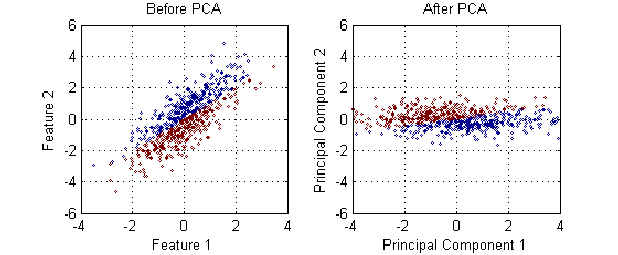

The figure above shows how the data is transformed after applying PCA.

## 1. Importing data

Let's start with importing the libraries that we are going to use.

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# I will keep the resulting plots
%matplotlib inline

# Enable Jupyter Notebook's intellisense
%config IPCompleter.greedy=True

In [2]:
data = pd.read_csv('../datasets/iris.data',header=None,names=['sepal_length(cm)','sepal_width(cm)',
                                                              'petal_length(cm)','petal_width(cm)','class'])

## 2. Explore the data

It is always good practice to do exploratory data analysis before building any models

In [5]:
# Display first five rows of the DataFrame
display(data.head())

# Get fundamental information about the DataFrame
display(data.info())

# We can also look at summary statistics
display(data.describe())

,sepal_length(cm),sepal_width(cm),petal_length(cm),petal_width(cm),class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length(cm)    150 non-null float64
sepal_width(cm)     150 non-null float64
petal_length(cm)    150 non-null float64
petal_width(cm)     150 non-null float64
class               150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


None

,sepal_length(cm),sepal_width(cm),petal_length(cm),petal_width(cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


As we can see above, we have 150 observations and no missing values. Let's visualize our data with a scatter plot,considering only petal length and petal width.

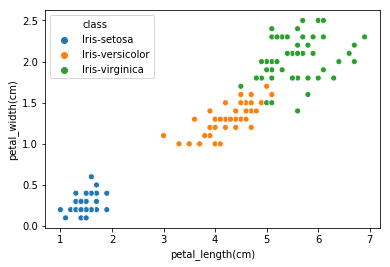

In [7]:
# Plot a scatter plot petal width vs petal length
sns.scatterplot(x='petal_length(cm)',y='petal_width(cm)',hue='class',data=data)
plt.show()

## 3. Applying PCA

There’s a slight amount of preparation required before applying PCA. Because the features in the Iris dataset are on totally different scales (e.g. the sepal lengths are much longer than the petal widths), we need to scale them so that the new principal components treat all features equally via singular value decomposition. We will use the standard scaler in sklearn:

In [20]:
X = data.drop('class',axis=1)
y = data['class']

In [35]:
sc = StandardScaler()
X_standardized = sc.fit_transform(X)


In [60]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_standardized)

In [61]:
principalDf = pd.DataFrame(data = principalComponents,
                           columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, data[['class']]], axis = 1)

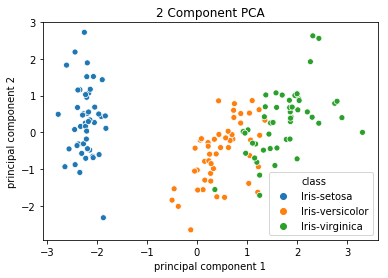

In [62]:
# Plot a scatter plot petal width vs petal length
sns.scatterplot(x='principal component 1',y='principal component 2',hue='class',data=finalDf)
plt.title("2 Component PCA")
plt.show()

## Explained Variance

The explained variance tells you how much information (variance) can be attributed to each of the principal components. This is important as while you can convert 4 dimensional space to 2 dimensional space, you lose some of the variance (information) when you do this. By using the attribute explained_variance_ratio_, you can see that the first principal component contains 72.77% of the variance and the second principal component contains 23.03% of the variance. Together, the two components contain 95.80% of the information.

In [63]:
explained_variance = pca.explained_variance_ratio_

In [66]:
explained_variance

array([0.72770452, 0.23030523])

In [67]:
label =['principal Component 1' ,'principal Component 2' ]

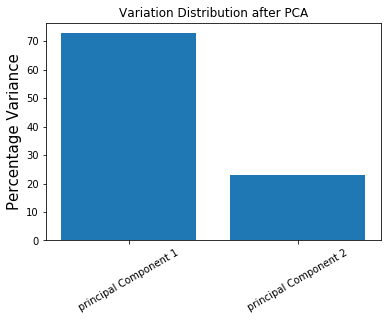

In [73]:
index = np.arange(len(label))
plt.bar(index, explained_variance*100)
plt.ylabel('Percentage Variance', fontsize=15)
plt.xticks(index, label, fontsize=10, rotation=30)
plt.title('Variation Distribution after PCA')
plt.show()

This shows that the <b>principal component 1 (Eigen Vector with largest Eigen value)</b> captures more than <b>72%</b> of the variance while <b>component 2 (Eigen Vector with second largest Eigen value)</b> captures around <b>23%</b> which is a combined over <b>95%</b> of the variance. Hence most of the variance in the data is retained after PCA.